## Random Forest Hauptnutzfläche
Random Forest Model zur Schätzung der Hauptnutzfläche

### Datensatz
Imports & Datensatz laden

In [1]:
from sklearn.ensemble import RandomForestRegressor

import src.package.charts as charts
import src.package.importer as im
import src.package.ml_helper as ml_helper

# load dataset
df = im.get_dataset('../package/datasets/train_set.csv')
X, y = ml_helper.hnf_dataset(df)
# X, y = ml_helper.hnf_dataset(df, upper_percentile='75%')
# X, y = ml_helper.hnf_dataset(df, upper_percentile='50%')
# X, y = ml_helper.hnf_dataset(df, upper_percentile='25%')

### Modell trainieren
Trainieren und testen des Models mit Repeated-Cross-Validation

In [2]:
regr = RandomForestRegressor(n_estimators=20, random_state=0)
scores = ml_helper.cross_validation(regr, X, y)

### Evaluieren
Auswertung des trainierten Models

In [3]:
ml_helper.evaluate_cv_scores(scores)

Evaluation
-------------------------
Fit time: 0.034942
Score time: 0.005086

[test_r2]
mean=0.892720 std=0.066617

[test_neg_mean_absolute_percentage_error]
mean=-0.205386 std=0.034097

[test_neg_root_mean_squared_error]
mean=-1314.426567 std=473.196681

[test_neg_mean_absolute_error]
mean=-612.011201 std=144.804070

[test_max_error]
mean=-7403.183333 std=3572.033618




### Features Importance
Wichtigkeit der Features für das Modell

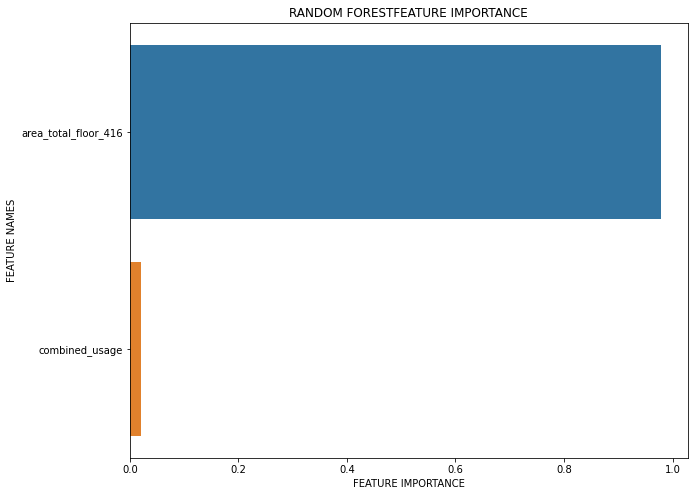

In [4]:
model = regr.fit(X, y)
charts.plot_feature_importance(model.feature_importances_, X.columns, 'RANDOM FOREST')

### Decision Tree
Visualisieren des Desicion Tree

In [5]:
# TODO: Tree visualisation